# 95-865 Spring 2020 Quiz 2

**Your name:** Solutions!

**Your Andrew ID:** I don't have an Andrew ID =(

## Problem 1: Neural Net Concepts (no coding) [40 points]

Parts **(a)** and **(b)** can be done in either order. Part **(c)** (which is very short) only depends on the introductions to parts **(a)** and **(b)**. Part **(d)** (which is also very short) depends on you completing both parts **(a)** and **(b)** first.

**(a) [12 points]** Consider the following input 1D array $[w,x,y,z]$. We feed this as input to a linear layer (no activation function) with the following weight matrix and bias vector:

$$
W
= \begin{bmatrix}
    \frac{1}{2} & 0 & -\frac{1}{2} & 0 \\
    0 & \frac{1}{2} & 0 & -\frac{1}{2} \\
    \frac{1}{2} & 0 & \frac{1}{2} & 0 \\
    0 & \frac{1}{2} & 0 & \frac{1}{2} \\
  \end{bmatrix},
\qquad
b
= [1, 1, -1, -1].
$$

What is the output of this linear layer given the input $[w,x,y,z]$? As a reminder, in 95-865, when we take weighted sums, we take the weighted sum of the input with each of the columns of weight matrix $W$ (i.e., the initial weighted sum taken would be of the input $[w,x,y,z]$ with $[\frac{1}{2},0,\frac{1}{2},0]$).

**Your answer here with an explanation (do not write code; be sure to provide an explanation--a correct answer without an explanation will not receive full credit):**

The weighted sums are computed via inner products to get:

- w/2 + y/2
- x/2 + z/2
- -w/2 + y/2
- -x/2 + z/2

Then we add the bias values to get the final output, a 1D array consisting of the following 4 values:

- w/2 + y/2 + 1
- x/2 + z/2 + 1
- -w/2 + y/2 - 1
- -x/2 + z/2 - 1



**(b)** Consider the following 2-by-2 input image (there's only a single channel, i.e., treat it as grayscale):

$$
\begin{bmatrix}
w & x\\
y & z
\end{bmatrix}.
$$

We feed this image into a Conv2D layer (no activation function) with the following two kernels:

1. The first kernel is:
$$
\begin{bmatrix}
1/2\\
1/2
\end{bmatrix},
$$
with bias value $1$.

2. The second kernel is
$$
\begin{bmatrix}
-1/2\\
1/2
\end{bmatrix},
$$
with bias value $-1$.

**Subpart i. [6 points]** What is the output of the first filter with the bias value added? Your answer should be in terms of $w$, $x$, $y$, and $z$.

**Your answer here with an explanation (do not write code; be sure to provide an explanation--a correct answer without an explanation will not receive full credit):**

Taking the convolution, we get:

[w/2 + y/2, x/2 + z/2]

Next, we add the bias value of 1 (to every entry) to get:

[w/2 + y/2 + 1, x/2 + z/2 + 1]

**Subpart ii. [6 points]** What is the output of the second filter with the bias value added? Your answer should be in terms of $w$, $x$, $y$, and $z$.

**Your answer here with an explanation (do not write code; be sure to provide an explanation--a correct answer without an explanation will not receive full credit):**

Taking the convolution, we get:

[-w/2 + y/2, -x/2 + z/2]

Next, we add the bias value of -1 (to every entry) to get:

[-w/2 + y/2 - 1, -x/2 + z/2 - 1]

**Subpart iii. [2 points]** The final output of the Conv2D layer just stacks your answers to subparts i and ii (for simplicity, treat each of the filter outputs as a row, and stack one row after another so that you get two rows). What is this final output?

**Your answer here with an explanation (do not write code; for this subpart it is fine to just state the final answer):**

We just stack the answers from the previous to subparts to get:

row 0: [w/2 + y/2 + 1, x/2 + z/2 + 1]

row 1: [-w/2 + y/2 - 1, -x/2 + z/2 - 1]

**(c) [8 points]** How many parameters does the neural net in part **(a)** have? What about the one in part **(b)**?

**Your answer for number of parameters in the neural net from part (a); please provide a very brief justification:** The weight matrix has 16 entries. The bias vector has 4 entries. Thus the total number of parameters is 16 + 4 = 20.

**Your answer for number of parameters in the neural net from part (b); please provide a very brief justification:** Each kernel/filter has 3 parameters (2 in the kernel and then a bias term). There are 2 kernels/filters. Thus, the total number of parameters is 2 * 3 = 6.

**(d) [6 points]** What do you notice about your answer to part **(a)** vs your answer to **(b)-iii**?

**Your answer here (do not write code):** The answer to part **(a)** is just the flattened version of the answer to part **(b)**.

## Problem 2: Predicting Yelp review ratings [60 points]

In this problem, we look at Yelp review data, where we evaluate how well two different classifiers are at using a review's text to predict the review's rating (1, 2, 3, 4, or 5 stars). We won't tell you what these classifiers are but we provide you with their outputs for some review data.

### Loading the data

Let's first load the Yelp review data. Run the cell below, which populates two Python lists `reviews` and `ratings`. The i-th review in `reviews` has a rating given by the i-th entry in `ratings`.

In [1]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
import csv
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

num_header_rows = 1
reviews = []  # raw text reviews
ratings = []  # these are number of stars from 1 to 5 (always an integer)
with open('mystery_data.csv', 'r', encoding='utf-8') as f:
    for row in csv.reader(f):
        if num_header_rows > 0:
            num_header_rows -= 1
            continue
        else:
            reviews.append(row[0])
            ratings.append(int(row[1]))
ratings = np.array(ratings)

num_reviews = len(reviews)

print(num_reviews)

3000


### Loading the two classifier outputs

Next, we load the predicted class probabilities for the data above according to mystery models A and B.

First, we load in the predicted class probabilities of mystery model A. The i-th row corresponds to the i-th review from `reviews`, and the columns correspond to the probabilities for ratings 1 star, 2 stars, 3 stars, 4 stars, and 5 stars.

In [2]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
model_A_predicted_probabilities = np.loadtxt('mystery_model_output_A.txt', encoding='utf-8')
model_A_predicted_probabilities.shape

(3000, 5)

In [3]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
model_B_predicted_probabilities = np.loadtxt('mystery_model_output_B.txt', encoding='utf-8')
model_B_predicted_probabilities.shape

(3000, 5)

**Note:** Parts **(b)**, **(c)**, and **(d)** build on each other and can be done separately from part **(a)**. Parts **(e)** and **(f)** build on part **(a)**; these can be done separately from parts **(b)**, **(c)**, and **(d)**.

**(a) [8 points]** Compute the predicted labels for the two different models by filling out the code cell below. When you run it, you should get the raw accuracies of the two models.

In [4]:
# ------------------------------------------------------------------------------
# WRITE YOUR CODE HERE
#

predicted_labels_model_A = np.argmax(model_A_predicted_probabilities, axis=1) + 1  # fill in with predicted labels for the 10000 reviews according to model A
predicted_labels_model_B = np.argmax(model_B_predicted_probabilities, axis=1) + 1  # fill in with predicted labels for the 10000 reviews according to model B

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

# do not modify the code below
print('Raw accuracy (model A):', np.mean(predicted_labels_model_A == ratings))
print('Raw accuracy (model B):', np.mean(predicted_labels_model_B == ratings))

Raw accuracy (model A): 0.49966666666666665
Raw accuracy (model B): 0.468


**(b) [8 points]** We now convert this problem into a binary classification task, where either 4 or 5 stars is considered the "positive" class; meanwhile 1, 2, or 3 stars are grouped together to form the "negative" class. We first convert the output of the two mystery models so that the probabilities are for the positive and negative classes.

For example, model A's predicted probabilities for the 0-th review are: 0.05 (1 star), 0.05 (2 stars), 0 (3 stars), 0.15 (4 stars), and 0.75 (5 stars). Then the predicted probability for the positive class would be 0.15 + 0.75 (either 4 or 5 stars). The predicted probability for the negative class would be 0.05 + 0.05 + 0 (1, 2, or 3 stars). Note that we do not actually need to store both probabilities since for the 0-th review, the predicted probability for the negative class is just 1 minus the predicted probability of the positive class.

Fill in the Python variables below for `model_A_predicted_positive_probability` and `model_B_predicted_positive_probabilities` that store all the predicted probabilities for the positive class according to the two models.

In [5]:
# ------------------------------------------------------------------------------
# WRITE YOUR CODE HERE
#

model_A_predicted_positive_probability = model_A_predicted_probabilities[:, 3:5].sum(axis=1)  # i-th entry is the predicted probability of the positive class for the i-th review according to model A
model_B_predicted_positive_probability = model_B_predicted_probabilities[:, 3:5].sum(axis=1)  # i-th entry is the predicted probability of the positive class for the i-th review according to model B

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

# do not modify the code below; these variables are needed in the next part
predicted_binary_labels_model_A = 1 * (model_A_predicted_positive_probability >= 0.5)
predicted_binary_labels_model_B = 1 * (model_B_predicted_positive_probability >= 0.5)
true_binary_labels = 1 * (ratings >= 4)

print('Binary raw accuracy (model A):', np.mean(predicted_binary_labels_model_A == true_binary_labels))
print('Binary raw accuracy (model B):', np.mean(predicted_binary_labels_model_B == true_binary_labels))

Binary raw accuracy (model A): 0.7486666666666667
Binary raw accuracy (model B): 0.708


**(c) [16 points]** Fill in the Python function below that calculates the **true positive rate (TPR)**, **false positive rate (FPR)**, **precision**, and **recall** given predicted binary labels `predicted_binary_labels` as well as `true_binary_labels`; each of these are 1D Numpy arrays of 0's and 1's (0 = negative class, 1 = positive class). If you fill in this function correctly, then running the cell below should output the TPR, FPR, precision, and recall for models A and B.

**For this part specifically, only use basic Python and Numpy. Do not use any other libraries; do not use sklearn. We want to see that you understand the basic calculations involved.**

In [6]:
def calculate_TPR_FPR_precision_recall(predicted_binary_labels, true_binary_labels):
    # predicted_binary_labels: 1D Numpy array of 0's and 1's; 0 = negative class, 1 = positive class
    # true_binary_labels: 1D Numpy array of 0's and 1's; 0 = negative class, 1 = positive class

    # --------------------------------------------------------------------------
    # WRITE YOUR CODE HERE
    #
    
    # fill these out with correct values
    true_pos_mask = (true_binary_labels == 1)
    true_neg_mask = (true_binary_labels == 0)
    TPR = predicted_binary_labels[true_pos_mask].sum() / true_pos_mask.sum()
    FPR = predicted_binary_labels[true_neg_mask].sum() / true_neg_mask.sum()
    predicted_pos_mask = (predicted_binary_labels == 1)
    precision = (predicted_binary_labels[predicted_pos_mask] == true_binary_labels[predicted_pos_mask]).sum() / predicted_pos_mask.sum()
    recall = TPR
    
    #
    # END OF YOUR CODE
    # --------------------------------------------------------------------------
    
    return TPR, FPR, precision, recall

# do not modify the code below
TPR_model_A, FPR_model_A, precision_model_A, recall_model_A = \
        calculate_TPR_FPR_precision_recall(predicted_binary_labels_model_A,
                                           true_binary_labels)
print('TPR (model A):', TPR_model_A)
print('FPR (model A):', FPR_model_A)
print('Precision (model A):', precision_model_A)
print('Recall (model A):', recall_model_A)
print()

TPR_model_B, FPR_model_B, precision_model_B, recall_model_B = \
        calculate_TPR_FPR_precision_recall(predicted_binary_labels_model_B,
                                           true_binary_labels)
print('TPR (model B):', TPR_model_B)
print('FPR (model B):', FPR_model_B)
print('Precision (model B):', precision_model_B)
print('Recall (model B):', recall_model_B)

TPR (model A): 0.9692230070635721
FPR (model A): 0.6807465618860511
Precision (model A): 0.7348890589135425
Recall (model A): 0.9692230070635721

TPR (model B): 0.9545913218970736
FPR (model B): 0.7721021611001965
Precision (model B): 0.7064973861090366
Recall (model B): 0.9545913218970736


**(d) [10 points]** Plot the ROC curves for models A and B over each other and compute the areas under their respective ROC curves.

Area under ROC curve (model A): 0.8374131922072723
Area under ROC curve (model B): 0.7667524419183258


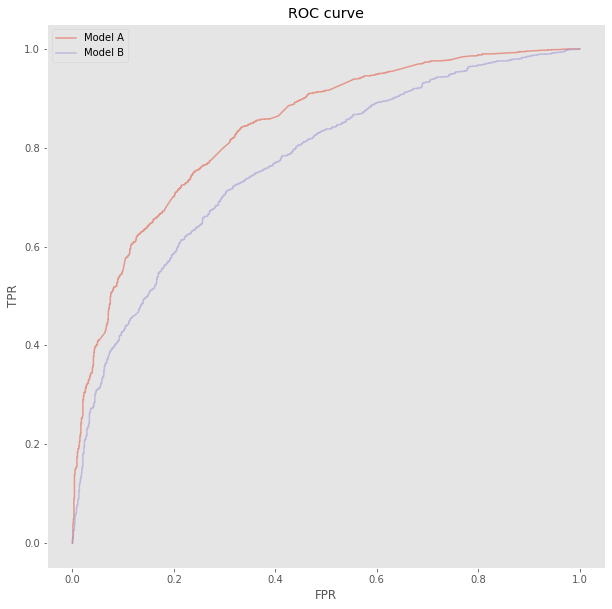

In [7]:
from sklearn.metrics import roc_curve  # do not modify
plt.figure(figsize=(10,10))  # do not modify

# ------------------------------------------------------------------------------
# WRITE YOUR CODE HERE
#

fpr, tpr, thresholds = roc_curve(true_binary_labels, model_A_predicted_positive_probability)
AUC_model_A = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, linestyle='-', alpha=0.5, color= "C0", label = "Model A")

fpr, tpr, thresholds = roc_curve(true_binary_labels, model_B_predicted_positive_probability)
AUC_model_B = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, linestyle='-', alpha=0.5, color= "C2", label = "Model B")

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

# do not modify the code below
print('Area under ROC curve (model A):', AUC_model_A)
print('Area under ROC curve (model B):', AUC_model_B)
plt.title("ROC curve")
plt.legend(loc="best")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show() 

From looking at the ROC curves you generated, between models A and B, which would you pick for predicting positive (4 or 5 stars) vs negative (1, 2, or 3 stars) classes?

**Your answer here; please very briefly justify your answer:** Model A is better than model B since its ROC curve is generally above that of model B.

**(e) [3 points]** One way to diagnose why a classifier might be making errors is to look at where egregious errors might be happening. In this problem, this would correspond to predicting a high rating when the real rating is very low. We have identified one such case for you:

In [8]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
print(reviews[62])

shoubu sushi has now been sold to new owners who have unfortunately cheapened the experience.  most of the dishes that made shoubu a standout restaurant are now gone.  the individual sushi pieces have been made significantly smaller while the prices have remained the same.  there is also a new chef whose skills leave a lot to be desired (some sushi pieces are mis-formed, others are missing key ingredients (like salmon in the spicy salmon roll).  i would not recommend returning to this restaurant.


What is the real rating for this review, and what is its predicted rating according to models A and B? For this part, please use the rating out of 5 stars and *not* the binary version considered in parts **(b)**, **(c)**, and **(d)**.

In [9]:
print(ratings[62])
print(predicted_labels_model_A[62])
print(predicted_labels_model_B[62])

1
5
5


**Real rating for review (out of 5 stars):** 1

**Predicted rating for review according to model A (out of 5 stars):** 5

**Predicted rating for review according to model B (out of 5 stars):** 5

**(f) [15 points]** Let's try to understand why the review in part **(e)** might be misclassified. You find out an extra piece of important information: the underlying classifiers for both models A and B uses a TF-IDF-weighted word counts to represent each review. In fact, the TF-IDF feature vector for this review is given as follows:

In [10]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
tfidf_feature_vector = np.loadtxt('mystery_features.txt', encoding='utf-8')  # TF-IDF feature vector specific to reviews[62]

Moreover, the i-th feature value corresponds to the i-th word of the following vocabulary:

In [11]:
# ------------------------------------------------------------------------------
# DO NOT MODIFY THIS CELL
#
with open('mystery_vocab.txt', 'r', encoding='utf-8') as f:
    vocab = [line.strip() for line in f.readlines()]

Write code that lists the top 10 values in `tfidf_feature_vector` along with which specific vocabulary words these top 10 values correspond to.

In [12]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE
#

sorted_pairs = sorted([(tfidf_feature_vector[idx], vocab[idx])
                       for idx in range(len(vocab))], reverse=True)[:10]
top_10_tfidf_values, top_10_vocab = zip(*sorted_pairs)

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

# do not modify the code below
for rank, (tfidf_value, word) in enumerate(zip(top_10_tfidf_values, top_10_vocab)):
    print('Rank %d (TF-IDF weight %f): %s'  % (rank + 1, tfidf_value, word))

Rank 1 (TF-IDF weight 0.321862): sushi
Rank 2 (TF-IDF weight 0.247916): pieces
Rank 3 (TF-IDF weight 0.247422): salmon
Rank 4 (TF-IDF weight 0.204364): mis
Rank 5 (TF-IDF weight 0.204364): formed
Rank 6 (TF-IDF weight 0.192440): standout
Rank 7 (TF-IDF weight 0.178720): significantly
Rank 8 (TF-IDF weight 0.170137): whose
Rank 9 (TF-IDF weight 0.165290): remained
Rank 10 (TF-IDF weight 0.162541): desired


From looking at the top 10 words with the highest TF-IDF weights, what are some that might be confusing the classifiers (from models A and B), and why do you think these words might confuse such classifiers that represent text using TF-IDF-weighted word counts?

**Your answer here (briefly explain without any code):** Words like "standout" and "desired" could indicate positive sentiment and thus be associated with a higher restaurant rating. Using TF-IDF weighted word counts means that the classifiers are using a bag-of-words model that might not be accounting for negation of specific words.